In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [7]:
# convert csv to dataframe
df=pd.read_csv("combined_df_1.csv")
df

,it,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,Gear Box,Drive Type,City
0,0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,5 Speed,FWD,Bangalore
1,0,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,5 Speed,FWD,Bangalore
2,0,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,5 Speed,FWD,Bangalore
3,0,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Bangalore
4,0,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,5 Speed,FWD,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,₹ 5.10 Lakh,Third Party insurance,"10,000 Kms",25.24 kmpl,998 CC,5.0,Others,5-Speed,NaN,Kolkata
8365,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,₹ 1.80 Lakh,Third Party insurance,"1,20,000 Kms",22.74 kmpl,796 CC,5.0,Others,5 Speed,FWD,Kolkata
8366,0,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,₹ 5.50 Lakh,Third Party insurance,"50,000 Kms",11.74 kmpl,1796 CC,5.0,Others,7 Speed,RWD,Kolkata
8367,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,₹ 1.40 Lakh,Third Party insurance,"40,000 Kms",18.5 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Kolkata


In [8]:
# count of missing values
df.isnull().sum()

it                       0
ft                       0
bt                       4
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
price                    0
Insurance Validity       4
Kms Driven               2
Mileage                287
Engine                   4
Seats_1                  6
Color                    3
Gear Box              2680
Drive Type            3714
City                     0
dtype: int64

## Handling missing values

In [9]:
# drop columns from the dataframe
df.drop(columns=["it","Gear Box","Drive Type"],inplace=True,axis=1)

In [10]:
# body type unique values
df["bt"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', nan, 'Wagon'],
      dtype=object)

In [11]:
# retrive nan values from body type
df[pd.isna(df["bt"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
3382,Petrol,NaN,Automatic,1,Toyota,Toyota Vellfire,2023,₹ 1.19 Crore,Comprehensive,"10,500 Kms",NaN,2487 CC,7.0,White,Delhi
5390,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,₹ 4.95 Lakh,Comprehensive,"13,500 Kms",19.71 kmpl,1197 CC,5.0,Silver,Hyderabad
5411,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2020,₹ 5.20 Lakh,Comprehensive,"16,415 Kms",19.71 kmpl,1197 CC,5.0,Grey,Hyderabad
8114,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,₹ 3.95 Lakh,Comprehensive,"21,166 Kms",19.71 kmpl,1197 CC,5.0,Blue,Kolkata


In [12]:
# replace nan values with model name
df.loc[df['model']=='Toyota Vellfire','bt'] = 'Minivans'
df.loc[df['model']=='Maruti Eeco','bt'] = 'Minivans'

In [13]:
# drop nan values
df.dropna(subset=["Insurance Validity","Kms Driven","Engine","Color"],inplace=True)

In [14]:
# retrive seats nan values
df[pd.isna(df["Seats_1"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
1175,Petrol,Hatchback,Manual,3,Maruti,Maruti Estilo,2009,₹ 2 Lakh,Third Party insurance,"40,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Bangalore
3528,Petrol,SUV,Manual,2,Nissan,Nissan Kicks,2019,₹ 7 Lakh,Third Party insurance,"60,000 Kms",NaN,1498 CC,NaN,Gray,Delhi
6211,Diesel,SUV,Manual,2,Ford,Ford Endeavour,2008,₹ 3.90 Lakh,Third Party insurance,"1,20,000 Kms",11.4 kmpl,2953 CC,NaN,Black,Jaipur
7608,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2010,₹ 1.20 Lakh,Third Party insurance,"70,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Kolkata
7669,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2009,₹ 1.20 Lakh,Third Party insurance,"50,000 Kms",19.5 kmpl,1061 CC,NaN,Gold,Kolkata
7745,Diesel,Sedan,Manual,1,Hindustan Motors,Ambassador,2014,₹ 1.20 Lakh,Third Party insurance,"1,20,000 Kms",12.8 kmpl,1995 CC,NaN,Yellow,Kolkata


In [15]:
# replace nan values of seats
df.loc[df['model']=='Maruti Estilo','Seats_1'] = 5.0
df.loc[df['model']=='Nissan Kicks','Seats_1'] = 5.0
df.loc[df['model']=='Ford Endeavour','Seats_1'] = 7.0
df.loc[df['model']=='Ambassador','Seats_1'] = 5.0


In [16]:
# count of missing values
df.isnull().sum()

ft                      0
bt                      0
transmission            0
ownerNo                 0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      0
Kms Driven              0
Mileage               284
Engine                  0
Seats_1                 0
Color                   0
City                    0
dtype: int64

In [17]:
# top 5 values from dataframe
df.head()

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,Bangalore


In [18]:
# size of the dataframe
df.shape

(8359, 15)

In [19]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8359 non-null   object 
 1   bt                  8359 non-null   object 
 2   transmission        8359 non-null   object 
 3   ownerNo             8359 non-null   int64  
 4   oem                 8359 non-null   object 
 5   model               8359 non-null   object 
 6   modelYear           8359 non-null   int64  
 7   price               8359 non-null   object 
 8   Insurance Validity  8359 non-null   object 
 9   Kms Driven          8359 non-null   object 
 10  Mileage             8075 non-null   object 
 11  Engine              8359 non-null   object 
 12  Seats_1             8359 non-null   float64
 13  Color               8359 non-null   object 
 14  City                8359 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


### Change data type- data cleaning

In [20]:
df['Kms Driven'] = df['Kms Driven'].str.replace('Kms', '').str.replace(',', '').str.strip().astype(int)
df['Mileage'] = df['Mileage'].str.replace('kmpl', '').str.replace('km/kg', '').str.strip().astype(float)
df['Engine'] = df['Engine'].str.replace('CC', '').str.strip()
df['Seats_1'] = df['Seats_1'].astype(int)
df['price'] = df['price'].str.extract(r'(\d+\.?\d*)').astype(float)

In [21]:
# drop columns from the dataframe
df.drop(columns=["Engine"],inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8359 entries, 0 to 8358
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8359 non-null   object 
 1   bt                  8359 non-null   object 
 2   transmission        8359 non-null   object 
 3   ownerNo             8359 non-null   int64  
 4   oem                 8359 non-null   object 
 5   model               8359 non-null   object 
 6   modelYear           8359 non-null   int64  
 7   price               8359 non-null   float64
 8   Insurance Validity  8359 non-null   object 
 9   Kms Driven          8359 non-null   int64  
 10  Mileage             8075 non-null   float64
 11  Seats_1             8359 non-null   int64  
 12  Color               8359 non-null   object 
 13  City                8359 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 914.4+ KB


In [23]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df.isnull().sum()

ft                    0
bt                    0
transmission          0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Insurance Validity    0
Kms Driven            0
Mileage               0
Seats_1               0
Color                 0
City                  0
dtype: int64

### Replace columns name

In [24]:
df=df.rename(columns={"ft":"Fuel type","bt":"body type","Seats_1":"Seats","oem":"Brand"})
df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [25]:
# statistical view of the numerical data 
df.describe()

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats
count,8359.000000,8359.000000,8359.000000,8.359000e+03,8359.000000,8359.000000
mean,1.359732,2016.511664,10.020416,5.899696e+04,19.245568,5.203254
std,0.641480,3.904774,12.627646,7.408873e+04,3.836193,0.663339
min,0.000000,1985.000000,1.000000,1.010000e+02,7.080000,2.000000
25%,1.000000,2014.000000,4.000000,3.000000e+04,17.010000,5.000000
50%,1.000000,2017.000000,6.190000,5.370100e+04,19.020000,5.000000
75%,2.000000,2019.000000,9.750000,8.000000e+04,21.400000,5.000000
max,5.000000,2023.000000,99.000000,5.500000e+06,140.000000,10.000000


In [26]:
# statistical view of the categorical data 
df.describe(include="object")

,Fuel type,body type,transmission,Brand,model,Insurance Validity,Color,City
count,8359,8359,8359,8359,8359,8359,8359,8359
unique,5,10,2,33,315,7,152,6
top,Petrol,Hatchback,Manual,Maruti,Honda City,Third Party insurance,Others,Delhi
freq,5547,3563,6046,2248,370,4051,2168,1484


### Data Visualization

In [27]:
df["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object)

In [28]:
df["Fuel type"].value_counts()

Fuel type
Petrol      5547
Diesel      2671
Cng           98
Electric      27
Lpg           16
Name: count, dtype: int64

<Axes: title={'center': 'count of Fuel type'}, xlabel='Fuel type', ylabel='count'>

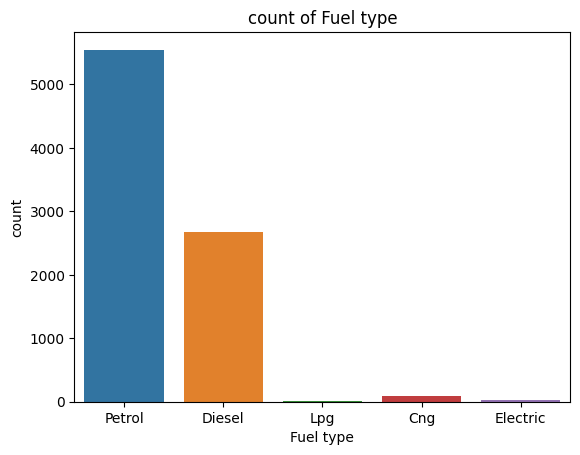

In [29]:
# visual the count of fuel type
plt.title("count of Fuel type")
sns.countplot(x=df["Fuel type"],data=df,hue="Fuel type")

In [30]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [31]:
df["body type"].value_counts()

body type
Hatchback        3563
SUV              2222
Sedan            2171
MUV               352
Minivans           27
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

<Axes: title={'center': 'count of body type'}, xlabel='body type', ylabel='count'>

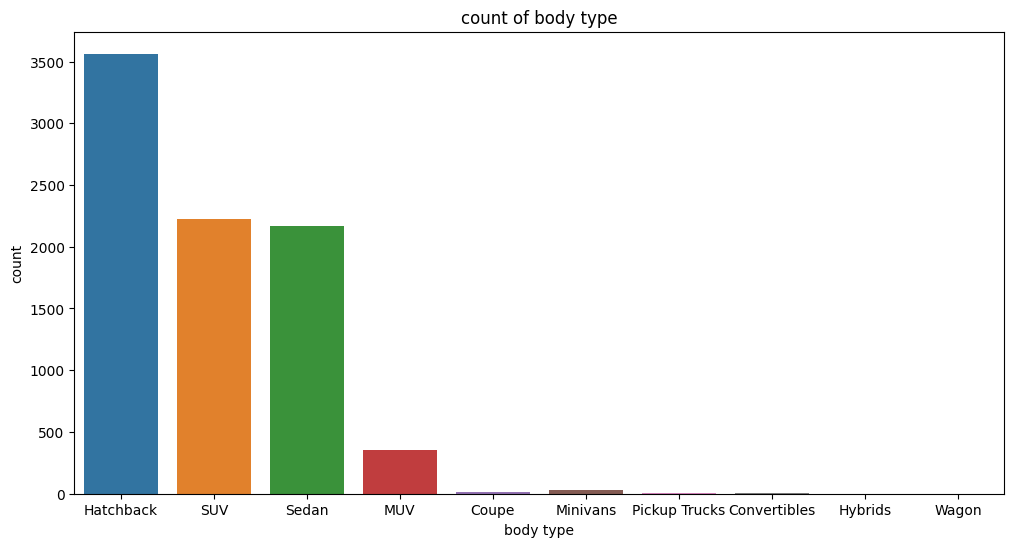

In [32]:
# visual the count of body type
plt.figure(figsize=(12,6))
plt.title("count of body type")
sns.countplot(x=df["body type"],data=df,hue="body type")

In [33]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [34]:
df["transmission"].value_counts()

transmission
Manual       6046
Automatic    2313
Name: count, dtype: int64

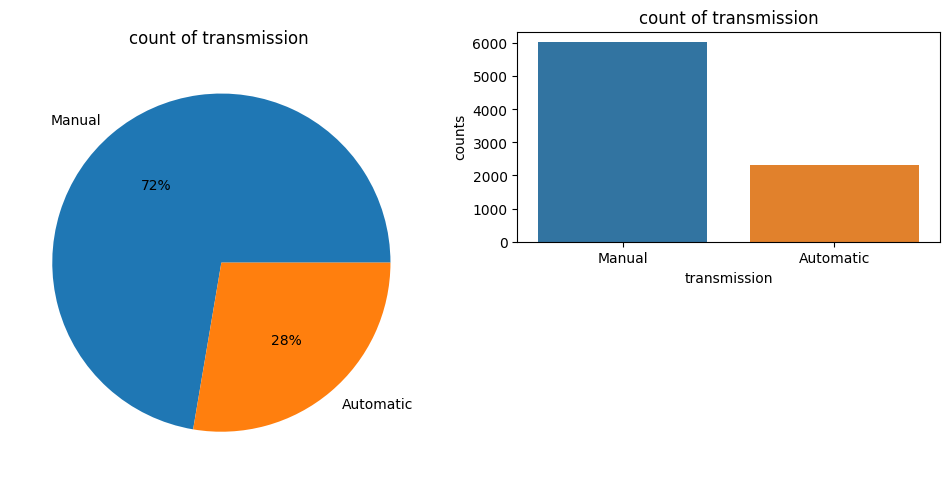

In [35]:
# visual the count of transmission
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("count of transmission ")
plt.pie(df["transmission"].value_counts(),autopct="%1.0f%%",labels=['Manual','Automatic'])
plt.subplot(2,2,2)
sns.countplot(x=df["transmission"],data=df,hue="transmission")
plt.xlabel("transmission")
plt.ylabel("counts")
plt.title("count of transmission")
plt.show()

In [36]:
df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [37]:
df["Brand"].value_counts()

Brand
Maruti                2248
Hyundai               1651
Honda                  864
Tata                   430
Mahindra               376
Toyota                 325
Ford                   311
Renault                311
Volkswagen             294
Mercedes-Benz          244
BMW                    184
Skoda                  160
Kia                    158
Audi                   156
Jeep                   112
MG                      90
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  35
Fiat                    31
Mitsubishi              14
Mini                    12
Citroen                  8
Porsche                  6
Lexus                    5
Mahindra Renault         5
Isuzu                    5
Mahindra Ssangyong       4
Hindustan Motors         4
Opel                     3
Name: count, dtype: int64

In [38]:
df["modelYear"].unique()

array([2015, 2018, 2014, 2020, 2017, 2021, 2019, 2022, 2016, 2011, 2009,
       2013, 2010, 2008, 2006, 2012, 2005, 2007, 2023, 1998, 2004, 2003,
       2001, 2002, 2000, 1985, 1997, 1999])

In [39]:
df["Insurance Validity"].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', '2', '1', 'Not Available'], dtype=object)

In [40]:
df["Insurance Validity"].value_counts()

Insurance Validity
Third Party insurance    4051
Comprehensive            3150
Third Party               630
Zero Dep                  303
Not Available             221
1                           3
2                           1
Name: count, dtype: int64

In [41]:
df["Color"].unique()

array(['White', 'Red', 'Others', 'Gray', 'Grey', 'Maroon', 'Orange',
       'Silver', 'Blue', 'Brown', 'Yellow', 'Black', 'Golden', 'Green',
       'O Purple', 'Other', 'Gold', 'TITANIUM GREY', 'Violet',
       'MODERN STEEL METALLIC', 'PLATINUM WHITE', 'Golden Brown',
       'Aurora Black Pearl', 'Beige', 'Star Dust', 'Flash Red', 'Purple',
       'PLATINUM WHITE PEARL', 'Wine Red', 'Taffeta White',
       'Minimal Grey', 'Fiery Red', 'T Wine', 'Prime Star Gaze',
       'TAFETA WHITE', 'P Black', 'Golden brown', 'METALL',
       'MET ECRU BEIGE', 'COPPER', 'TITANIUM', 'CHILL', 'Burgundy',
       'Lunar Silver Metallic', 'SILKY SILVER', 'BERRY RED',
       'PREMIUM AMBER METALLIC', 'R EARTH', 'PLATINUM SILVER',
       'ORCHID WHITE PEARL', 'CARNELIAN RED PEARL', 'POLAR WHITE',
       'BEIGE', 'Medium Blue', 'Alabaster Silver Metallic',
       'Carbon Steel', 'Cavern Grey', 'ESPRESO_BRWN', 'Pearl White',
       'Polar White', 'Magma Grey', 'Dark Red', 'Falsa Colour', 'Cherry',
       'H

In [42]:
df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [43]:
# Check for duplicate rows
duplicates = df.duplicated()

# Show duplicate rows
duplicate_rows = df[df.duplicated()]


In [44]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [45]:
# check seats with respect to body type
print(f'Hatchback: {df[df["body type"]=="Hatchback"]["Seats"].unique()}')
print(f'SUV: {df[df["body type"]=="SUV"]["Seats"].unique()}')
print(f'Sedan: {df[df["body type"]=="Sedan"]["Seats"].unique()}')
print(f'MUV: {df[df["body type"]=="MUV"]["Seats"].unique()}')
print(f'Coupe: {df[df["body type"]=="Coupe"]["Seats"].unique()}')
print(f'Minivans: {df[df["body type"]=="Minivans"]["Seats"].unique()}')
print(f'Convertibles: {df[df["body type"]=="Convertibles"]["Seats"].unique()}')
print(f'Hybrids: {df[df["body type"]=="Hybrids"]["Seats"].unique()}')
print(f'Wagon: {df[df["body type"]=="Wagon"]["Seats"].unique()}')
print(f'MPickup Trucks: {df[df["body type"]=="Pickup Trucks"]["Seats"].unique()}')

Hatchback: [5 4 6]
SUV: [ 5  7  6  8  4  9 10]
Sedan: [5 4]
MUV: [ 7  8 10  6  5]
Coupe: [5 4 2]
Minivans: [5 7 8]
Convertibles: [4 2]
Hybrids: [4]
Wagon: [5]
MPickup Trucks: [5 2]


In [46]:
#convert dataframe to csv
path=r"C:/Users/Surenthiran/Desktop/Car_dekho/final_model.csv"
df.to_csv(path,index=False)

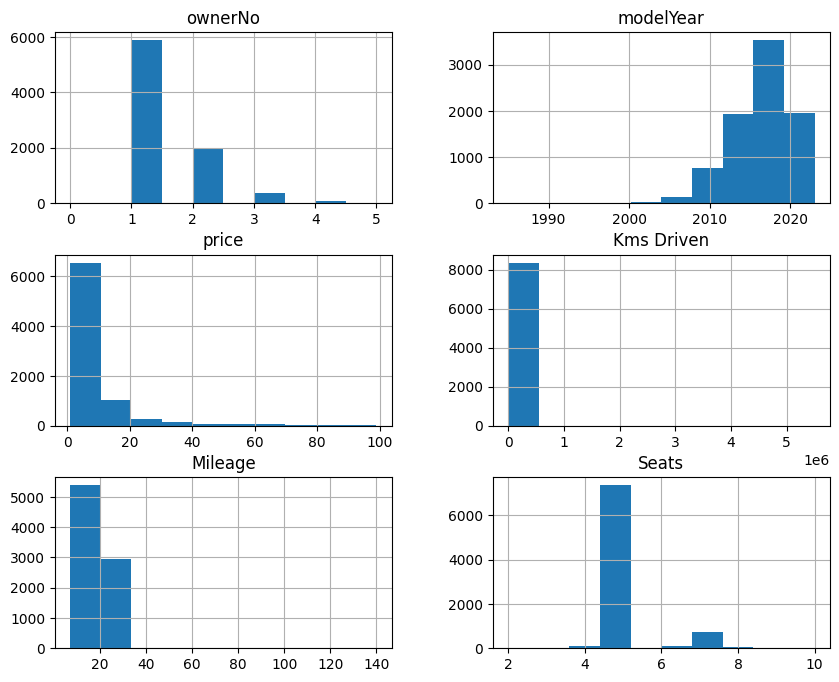

In [47]:
# histogram to visual the data distribution
df.hist(figsize=(10,8))
plt.show()

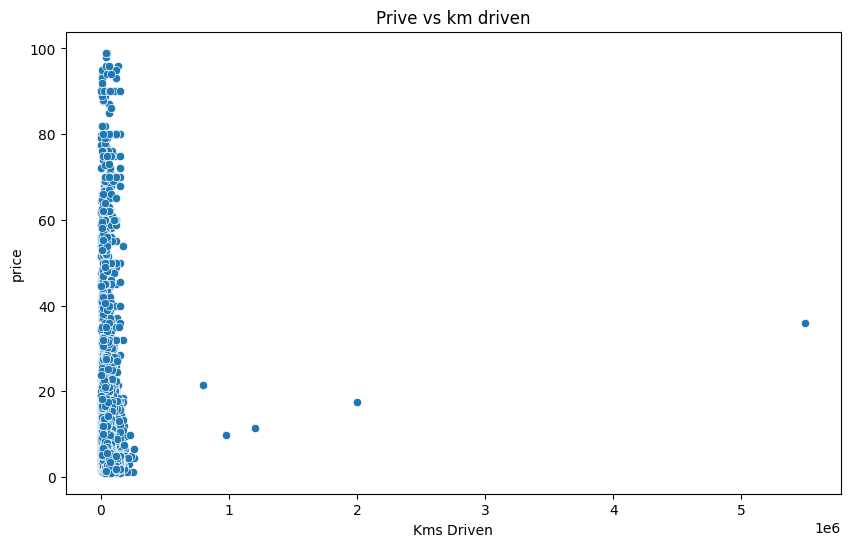

In [48]:
# scatterplot to visual the data distribution
plt.figure(figsize=(10, 6))
plt.title("Prive vs km driven")
sns.scatterplot(y='price', x='Kms Driven', data=df)
plt.xlabel("Kms Driven")
plt.ylabel("price")
plt.show()


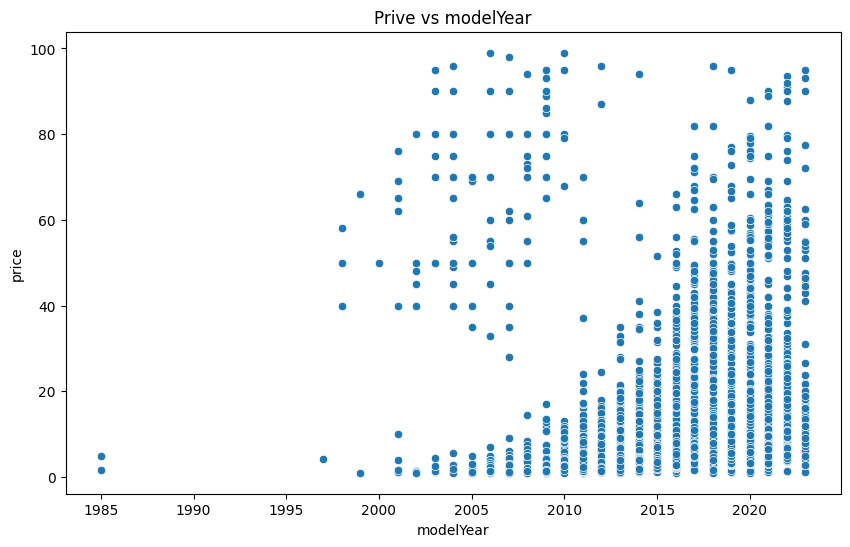

In [49]:
# scatterplot to visual the data distribution
plt.figure(figsize=(10, 6))
plt.title("Prive vs modelYear")
sns.scatterplot(y='price', x='modelYear', data=df)
plt.xlabel("modelYear")
plt.ylabel("price")
plt.show()

<Axes: xlabel='transmission', ylabel='price'>

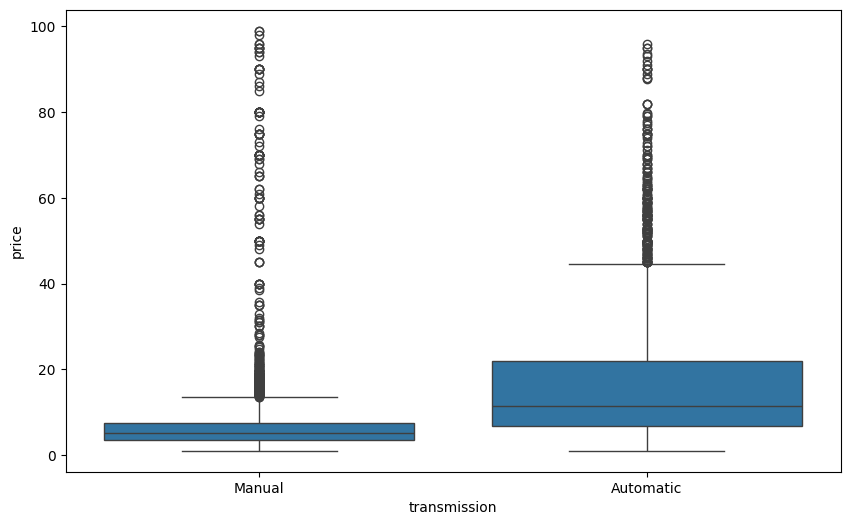

In [50]:
# transmission and price
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission', y='price', data=df)

<Axes: xlabel='modelYear', ylabel='price'>

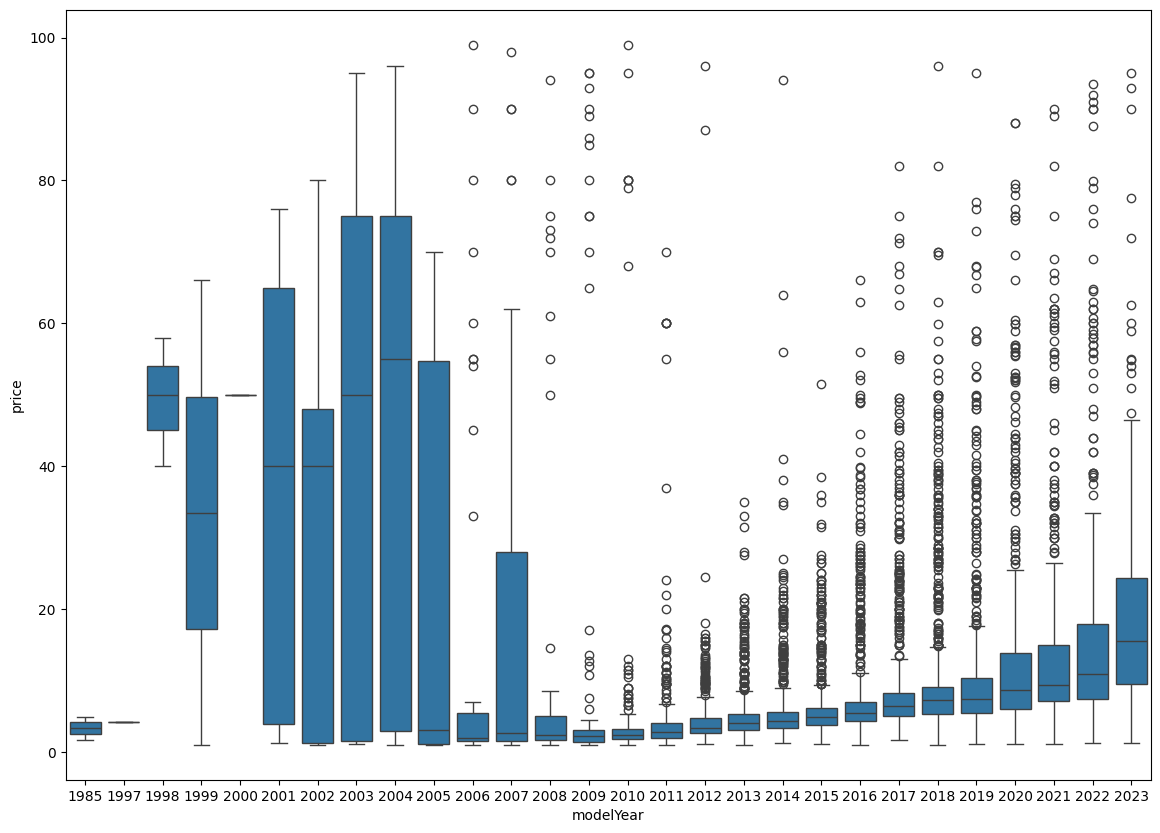

In [51]:
# modelYear and price
plt.figure(figsize=(14, 10))
sns.boxplot(x='modelYear', y='price', data=df)

<Axes: xlabel='body type', ylabel='price'>

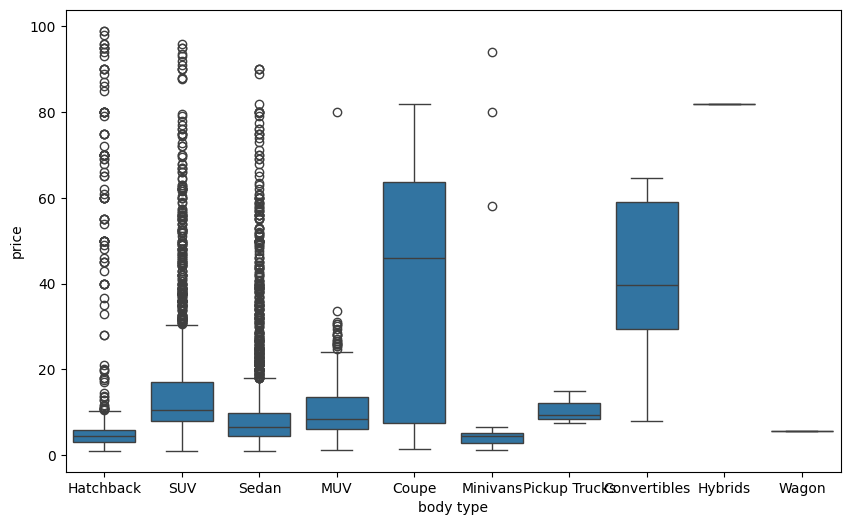

In [52]:
# body type	 and price
plt.figure(figsize=(10,6))
sns.boxplot(x='body type', y='price', data=df)

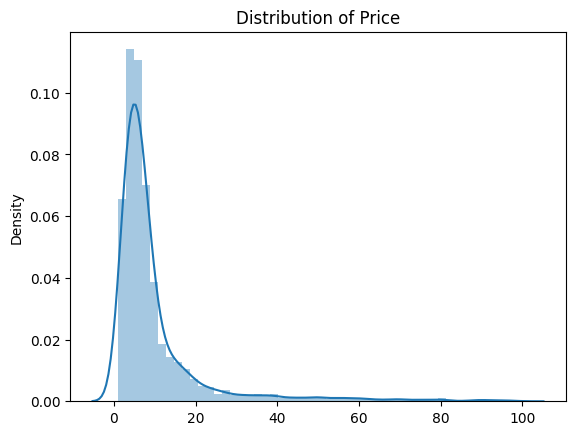

In [53]:
#distribution before outliers removing
sns.distplot(x=df["price"], kde=True)  # kde=True adds the KDE curve along with the histogram
plt.title("Distribution of Price")
plt.show()

In [54]:
#convert dataframe to csv
path=r"C:/Users/Surenthiran/Desktop/Car_dekho/final_df.csv"
df.to_csv(path,index=False)

In [55]:
# Removing outliers from the 'price' column using IQR method
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers from DataFrame
df_filtered = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Count of lower outliers
low_outliers = len(df[df['price'] < (Q1 - 1.5 * IQR)])

# Count of upper outliers
high_outliers = len(df[df['price'] > (Q3 + 1.5 * IQR)])

# Print outlier counts
print(f"Count of lower outliers: {low_outliers}")
print(f"Count of upper outliers: {high_outliers}")


Count of lower outliers: 0
Count of upper outliers: 919


In [56]:
df_filtered.reset_index(inplace=True,drop=True)
df_filtered

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
7436,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
7437,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
7438,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [57]:
df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [58]:
df[df["Brand"] == "BMW"]["price"].max()

np.float64(93.5)

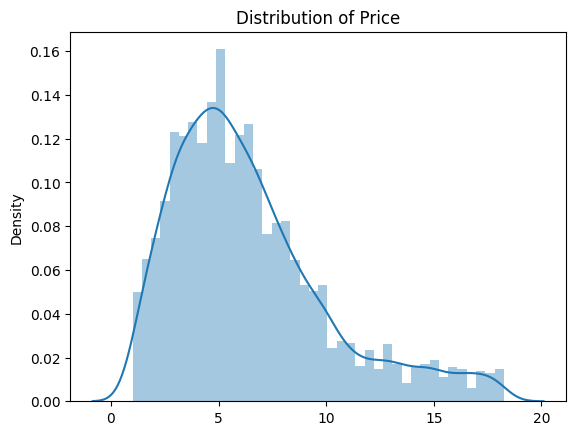

In [59]:
#distribution after outliers removing
sns.distplot(x=df_filtered["price"], kde=True)  # kde=True adds the KDE curve along with the histogram
plt.title("Distribution of Price")
plt.show()

<Axes: xlabel='body type', ylabel='price'>

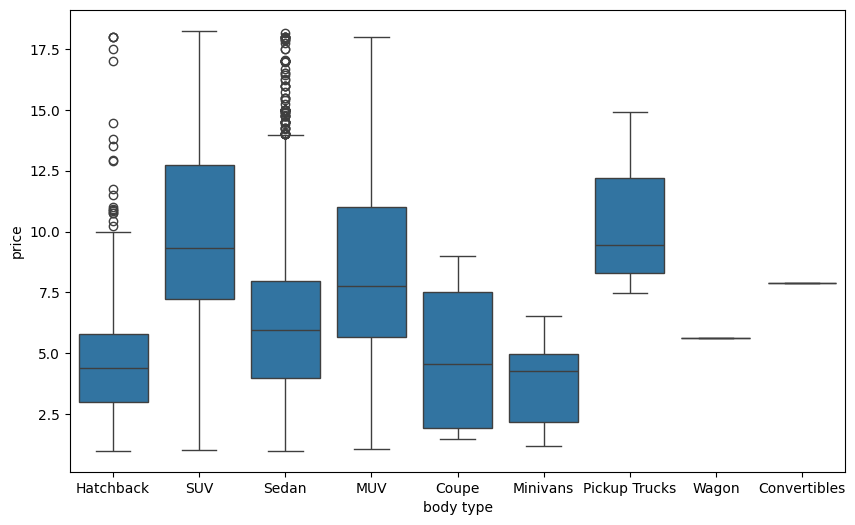

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(x='body type', y='price', data=df_filtered)

In [61]:
max_price_index = df_filtered["price"].idxmax()
max_price_row = df_filtered.loc[max_price_index]
print(max_price_row)

Fuel type                     Diesel
body type                        SUV
transmission               Automatic
ownerNo                            1
Brand                        Hyundai
model                 Hyundai Tucson
modelYear                       2017
price                          18.25
Insurance Validity     Comprehensive
Kms Driven                     57000
Mileage                        16.38
Seats                              5
Color                          White
City                       Bangalore
Name: 112, dtype: object


## Scaling and Encoding 

In [63]:
import pickle

In [64]:
# creating a list to hold name of the categorical columns
catg_col=df_filtered.select_dtypes(include="object").columns.to_list()

In [65]:
catg_col

['Fuel type',
 'body type',
 'transmission',
 'Brand',
 'model',
 'Insurance Validity',
 'Color',
 'City']

In [66]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
encoder.fit(df_filtered[catg_col])


OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [67]:
encoder.categories_

[array(['Cng', 'Diesel', 'Electric', 'Lpg', 'Petrol'], dtype=object),
 array(['Convertibles', 'Coupe', 'Hatchback', 'MUV', 'Minivans',
        'Pickup Trucks', 'SUV', 'Sedan', 'Wagon'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Datsun', 'Fiat', 'Ford',
        'Hindustan Motors', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
        'Kia', 'Land Rover', 'MG', 'Mahindra', 'Mahindra Renault',
        'Mahindra Ssangyong', 'Maruti', 'Mercedes-Benz', 'Mini',
        'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
 array(['Ambassador', 'Audi A3', 'Audi A4', 'Audi A6', 'Audi Q3',
        'Audi Q5', 'Audi Q7', 'BMW 1 Series', 'BMW 3 Series',
        'BMW 3 Series GT', 'BMW 5 Series', 'BMW 6 Series', 'BMW 7 Series',
        'BMW X1', 'BMW X3', 'BMW X5', 'BMW X7', 'Chevrolet Aveo',
        'Chevrolet Beat', 'Chevrolet Captiva', 'Chevrolet Cruze',
        '

In [68]:
#list of new column
new_encoded_col= list(encoder.get_feature_names_out(catg_col))
new_encoded_col

['Fuel type_Cng',
 'Fuel type_Diesel',
 'Fuel type_Electric',
 'Fuel type_Lpg',
 'Fuel type_Petrol',
 'body type_Convertibles',
 'body type_Coupe',
 'body type_Hatchback',
 'body type_MUV',
 'body type_Minivans',
 'body type_Pickup Trucks',
 'body type_SUV',
 'body type_Sedan',
 'body type_Wagon',
 'transmission_Automatic',
 'transmission_Manual',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Citroen',
 'Brand_Datsun',
 'Brand_Fiat',
 'Brand_Ford',
 'Brand_Hindustan Motors',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Isuzu',
 'Brand_Jaguar',
 'Brand_Jeep',
 'Brand_Kia',
 'Brand_Land Rover',
 'Brand_MG',
 'Brand_Mahindra',
 'Brand_Mahindra Renault',
 'Brand_Mahindra Ssangyong',
 'Brand_Maruti',
 'Brand_Mercedes-Benz',
 'Brand_Mini',
 'Brand_Mitsubishi',
 'Brand_Nissan',
 'Brand_Porsche',
 'Brand_Renault',
 'Brand_Skoda',
 'Brand_Tata',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Brand_Volvo',
 'model_Ambassador',
 'model_Audi A3',
 'model_Audi A4',
 'model_Audi A6',
 'model_Audi Q

In [69]:
# transforming the data
df_filtered[new_encoded_col]=encoder.transform(df_filtered[catg_col])
df_filtered.head()

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# drop the unwanted columns
df_filtered.drop(columns=catg_col,inplace=True)
df_filtered

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,3,2015,4.00,120000,23.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,8.11,32706,17.00,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,2018,5.85,11949,23.84,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,2014,4.62,17794,19.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,2015,7.90,60000,23.65,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1,2022,5.10,10000,25.24,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7436,1,2014,1.80,120000,22.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7437,3,2011,5.50,50000,11.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7438,1,2012,1.40,40000,18.50,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
with open('encoder.pkl','wb') as file:
    pickle.dump(encoder,file)

In [72]:
#convert dataframe to csv
path=r"C:/Users/Surenthiran/Desktop/Car_dekho/std_enc.csv"
df_filtered.to_csv(path,index=False)